# Lesson 4 Assignment - Automobile Price Hypothesis Testing
## Author - Tariq Ayub

### Instructions
Test hypotheses for the price of automobiles:

1. Compare and test the normality of the distributions of **price** and **log price**. <br/>
Use both a graphical method and a formal test. Hint: remember these relationships will always be approximate.

2. Test significance of **price (or log price)** stratified by 
a) **fuel type**, b) **aspiration**, and c) **rear vs. front wheel drive**. <br />Use both graphical methods and the formal test.

3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **price (or log price** if closer to a normal distribution) of autos stratified by **body style**.

4. Graphically explore the differences between the price conditioned by the categories of each variable. <br/>
Hint: Make sure you have enough data for each category and drop categories with insufficient data.

5. Use standard ANOVA and Tukey HSD to test the differences of these groups.


#### Note: 
Please clearly outline the results of these tests with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [163]:
# Cleaned up Dataset location
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [164]:
# Import libraries
import pandas as pd
#saving the file into pandas dataframe
auto = pd.read_csv(fileName)

In [166]:
auto.columns = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [167]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [180]:
auto.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [173]:
auto.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [171]:
#dropping column with several missing values
del auto['normalized-losses']

In [172]:
print(auto)

     symboling         make fuel-type aspiration num-of-doors   body-style  \
0            3  alfa-romero       gas        std          two  convertible   
1            3  alfa-romero       gas        std          two  convertible   
2            1  alfa-romero       gas        std          two    hatchback   
3            2         audi       gas        std         four        sedan   
4            2         audi       gas        std         four        sedan   
5            2         audi       gas        std          two        sedan   
6            1         audi       gas        std         four        sedan   
7            1         audi       gas        std         four        wagon   
8            1         audi       gas      turbo         four        sedan   
9            0         audi       gas      turbo          two    hatchback   
10           2          bmw       gas        std          two        sedan   
11           0          bmw       gas        std         four   

In [174]:
import numpy as np
auto.shape


(205, 25)

In [175]:
#replacing missing values with NaN
auto = auto.replace(to_replace= '?', value = float("NaN"))

In [192]:
#evaluating NaN
auto.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [193]:
#removing rows with NaN 
autodata = auto.dropna(axis=0)

In [194]:
#data size reduced from 205 to 193 rows
print(autodata)

     symboling         make fuel-type aspiration num-of-doors   body-style  \
0            3  alfa-romero       gas        std          two  convertible   
1            3  alfa-romero       gas        std          two  convertible   
2            1  alfa-romero       gas        std          two    hatchback   
3            2         audi       gas        std         four        sedan   
4            2         audi       gas        std         four        sedan   
5            2         audi       gas        std          two        sedan   
6            1         audi       gas        std         four        sedan   
7            1         audi       gas        std         four        wagon   
8            1         audi       gas      turbo         four        sedan   
10           2          bmw       gas        std          two        sedan   
11           0          bmw       gas        std         four        sedan   
12           0          bmw       gas        std          two   

In [182]:
#reinding after dropping na
autodata.reset_index()

,index,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,3,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,4,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,5,2,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,6,1,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,7,1,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,8,1,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,10,2,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [198]:
#converting data type to int
autodata.loc[:, "price"] = autodata.loc[:, "price"].astype(int)

In [199]:
autodata.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [287]:
from __future__ import division 

import numpy
import pandas
import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn as sns
import math

In [303]:
autodata.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,logprice
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565,13285.025907,9.351478
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910,8089.082886,0.511149
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000,8.540519
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000,7738.000000,8.953899
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000,10245.000000,9.234545
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000,16515.000000,9.712024
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000,10.723267


(array([ 9.,  7., 20., 17., 16., 11.,  9., 10.,  4.,  7.,  5.,  5.,  7.,
         4.,  2.,  5.,  7.,  8.,  3.,  7.,  4.,  1.,  0.,  2.,  1.,  2.,
         1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,
         1.,  2.,  0.,  0.,  2.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 5118.        ,  5789.36666667,  6460.73333333,  7132.1       ,
         7803.46666667,  8474.83333333,  9146.2       ,  9817.56666667,
        10488.93333333, 11160.3       , 11831.66666667, 12503.03333333,
        13174.4       , 13845.76666667, 14517.13333333, 15188.5       ,
        15859.86666667, 16531.23333333, 17202.6       , 17873.96666667,
        18545.33333333, 19216.7       , 19888.06666667, 20559.43333333,
        21230.8       , 21902.16666667, 22573.53333333, 23244.9       ,
        23916.26666667, 24587.63333333, 25259.        , 25930.36666667,
        26601.73333333, 27273.1       , 27944.46666667, 28615.83333333,
        29

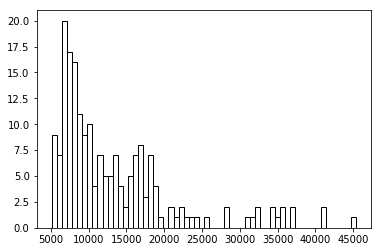

In [258]:
#plotting distribution of price
pyplot.hist(autodata.loc[:, "price"], bins= 60, color='white', edgecolor='black')


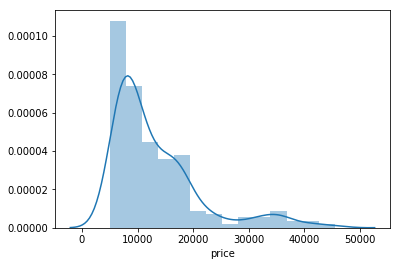

In [275]:
#potting distribution of price without binning
sns.distplot(autodata['price'])

In [291]:
#create log of the price column
autodata['logprice'] = np.log(autodata['price'])


C:\Users\T\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


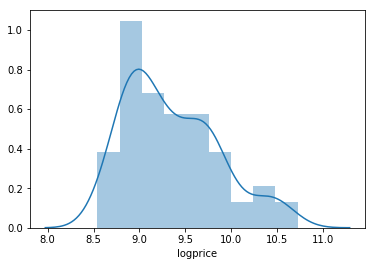

In [293]:
#histogram and KDP of the log price distribution 
sns.distplot(autodata['logprice'])

In [306]:
#Test significance of price (or log price) stratified by a) fuel type, b) aspiration, and c) rear vs. front wheel drive. 
#Use both graphical methods and the formal test.

In [334]:
#Stratifing fuel = gas data
fuelgas = autodata.loc[autodata['fuel-type'] == 'gas', ['price']]

In [325]:
#statistics for price when fuel type = gas
fuelgas.describe()

,price
count,174.000000
mean,12977.252874
std,8074.239109
min,5118.000000
25%,7604.500000
50%,9988.500000
75%,16322.000000
max,45400.000000


In [335]:
#Stratifing fuel = diesel data
fueldiesel = autodata.loc[autodata['fuel-type'] == 'diesel', ['price']]

In [336]:
#statistics for price when fuel type = diesel
fueldiesel.describe()

,price
count,19.000000
mean,16103.578947
std,7878.650317
min,7099.000000
25%,8745.000000
50%,13860.000000
75%,20407.000000
max,31600.000000


In [390]:
from scipy.stats import norm
import numpy.random as nr
#converting dataframe to array
pop_A = numpy.array(fuelgas)
pop_B = numpy.array(fueldiesel)

In [397]:
#converting array into N-dimensional array 
pop_A = pop_A.ravel()
pop_B = pop_B.ravel()

In [396]:
print(b)

[13495 16500 16500 13950 17450 15250 17710 18920 23875 16430 16925 20970
 21105 24565 30760 41315 36880  5151  6295  6575  5572  6377  7957  6229
  6692  7609  8921 12964  6479  6855  5399  6529  7129  7295  7295  7895
  9095  8845 10295 12945 10345  6785 11048 32250 35550 36000  5195  6095
  6795  6695  7395  8845  8495 10595 10245 11245 18280 34184 35056 40960
 45400 16503  5389  6189  6669  7689  9959  8499 12629 14869 14489  6989
  8189  9279  9279  5499  6649  6849  7349  7299  7799  7499  7999  8249
  8949  9549 13499 14399 13499 17199 19699 18399 11900 12440 15580 16695
 16630 18150  5572  7957  6229  6692  7609  8921 12764 22018 32528 34028
 37028 11850 12170 15040 15510 18150 18620  5118  7053  7603  7126  7775
  9960  9233 11259  7463 10198  8013 11694  5348  6338  6488  6918  7898
  8778  6938  7198  7738  8358  9258  8058  8238  9298  9538  8449  9639
  9989 11199 11549 17669  8948  9988 10898 11248 16558 15998 15690 15750
  7975  8195  8495  9995 11595  9980 13295 12290 12

In [401]:
type(pop_A)

numpy.ndarray

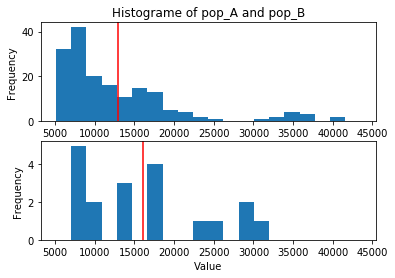

In [398]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)  

In [399]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom      22.334815
Difference   -3126.326074
Statistic       -1.638262
PValue           0.115380
Low95CI      -7080.500427
High95CI       827.848280
dtype: float64

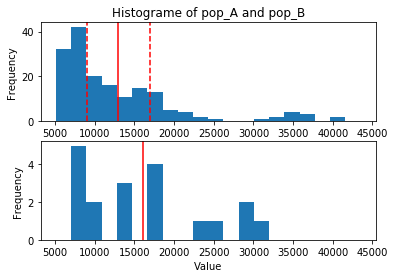

In [406]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)  

In [ ]:
#although gas and diesel are clearly different classes but we cannot reject
# null hypothesis also becuase t-statistic is very low and p-value is high.
#also mean is within the confidence interval 

In [410]:
#Stratifing aspiration data
std = autodata.loc[autodata['aspiration'] == 'std', ['price']]
turbo = autodata.loc[autodata['aspiration'] == 'turbo', ['price']]

In [413]:
#statistics for aspiration types
std.describe()

,price
count,158.000000
mean,12578.449367
std,8314.125945
min,5118.000000
25%,7311.500000
50%,9268.500000
75%,15562.500000
max,45400.000000


In [414]:
turbo.describe()

,price
count,35.000000
mean,16474.714286
std,6125.247758
min,7689.000000
25%,12161.500000
50%,16503.000000
75%,18997.500000
max,31600.000000


In [415]:
from scipy.stats import norm
import numpy.random as nr
#converting dataframe to array
pop_A = numpy.array(std)
pop_B = numpy.array(turbo)

In [416]:
#converting array into N-dimensional array 
pop_A = pop_A.ravel()
pop_B = pop_B.ravel()

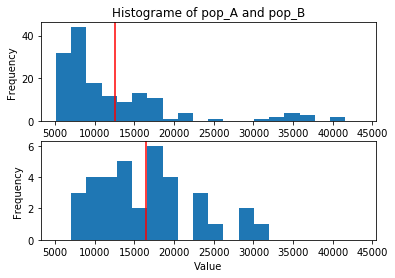

In [417]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)

In [418]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom      65.068892
Difference   -3896.264919
Statistic       -3.171303
PValue           0.002315
Low95CI      -6349.900764
High95CI     -1442.629073
dtype: float64

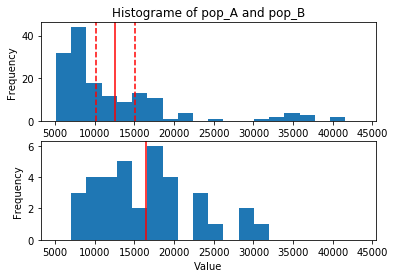

In [419]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)  

In [422]:
#Stratifing drive-wheels data
fwd = autodata.loc[autodata['drive-wheels'] == 'fwd', ['price']]
rwd = autodata.loc[autodata['drive-wheels'] == 'rwd', ['price']]

In [423]:
from scipy.stats import norm
import numpy.random as nr
#converting dataframe to array
pop_A = numpy.array(fwd)
pop_B = numpy.array(rwd)

In [424]:
#converting array into N-dimensional array 
pop_A = pop_A.ravel()
pop_B = pop_B.ravel()

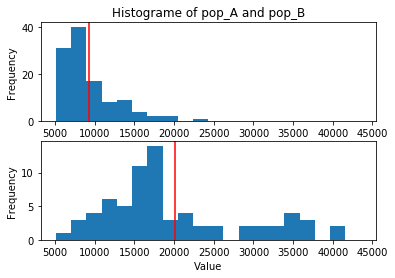

In [425]:
%matplotlib inline
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
    
def plot_pop(a, b, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_plot(a, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)

plot_pop(pop_A, pop_B)

In [426]:
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b, equal_var=False)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
   

test = t_test(pop_A, pop_B, 0.05)
test

DegFreedom    8.210103e+01
Difference   -1.090614e+04
Statistic    -9.607957e+00
PValue        4.406201e-15
Low95CI      -1.316420e+04
High95CI     -8.648072e+03
dtype: float64

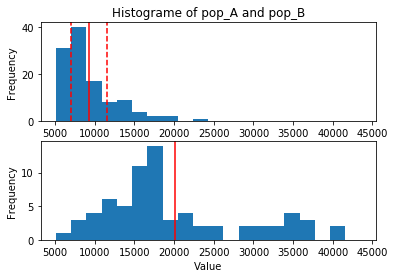

In [427]:
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
    
plot_t(pop_A, pop_B, test)  

In [ ]:
#reject null hypothesis. FWD and RWD prices are significantly different 
#rather then just due to error and randomness in the data

In [432]:
#unique body styles
autodata['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [433]:
#Stratifing body style data
convertible = autodata.loc[autodata['body-style'] == 'convertible', ['price']]
hatchback = autodata.loc[autodata['body-style'] == 'hatchback', ['price']]
sedan = autodata.loc[autodata['body-style'] == 'sedan', ['price']]
wagon = autodata.loc[autodata['body-style'] == 'wagon', ['price']]
hardtop = autodata.loc[autodata['body-style'] == 'hardtop', ['price']]

In [434]:
from scipy.stats import norm
import numpy.random as nr
#converting dataframe to array
pop_convertible = numpy.array(convertible)
pop_hatchback = numpy.array(hatchback)
pop_sedan = numpy.array(sedan)
pop_wagon = numpy.array(wagon)
pop_hardtop = numpy.array(hardtop)

Text(0.5, 1.0, 'Box plot of variables')

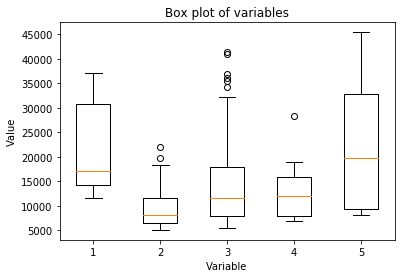

In [437]:

df1 = pop_convertible.tolist()
df2 = pop_hatchback.tolist()
df3 = pop_sedan.tolist()
df4 = pop_wagon.tolist()
df5 = pop_hardtop.tolist()


import matplotlib.pyplot as plt
plt.boxplot([df1, df2, df3, df4, df5])
plt.ylabel('Value')
plt.xlabel('Variable')
plt.title('Box plot of variables')

In [439]:
    import scipy.stats as ss
f_statistic, p_value = ss.f_oneway(df1, df2, df3, df4, df5)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = [9.04539303]
P-value = [1.05483425e-06]


In [440]:
#The F statistic is fairly large and the p-value is small. 
#We can reject the null hypothesis that the 5 variables have the same mean,
#as the probability of the differences arising from random chance is quite low.

In [487]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': df1 + df2 + df3 + df4, 
                   'group_num': ['1'] * 50 + ['2'] * 50 + ['3'] * 50 + ['4'] * 50+ ['5'] * 50})
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

ValueError: arrays must all be same length